In [ ]:
Обрахуємо коефіцієнт еластичності для певної моделі за допомогою лінійної регресії

In [1]:
%matplotlib inline
from Visualization import give_data, give_models_tree
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Visualization import plot_dynamics

In [2]:
def elasticity_ols(data, give_info=False):# будує лінійну регресію відносно dataframe: Quantity ~ PriceUSD 
    linreg = smf.ols('Quantity ~ PriceUSD', data=data).fit()
    if give_info:
        print(linreg.summary())
        sns.set()
        fig1 = plt.figure(figsize=(12,8))
        fig2 = plt.figure(figsize=(12, 8))
        fig3 = plt.figure(figsize=(12,8))
        fig1 = sm.graphics.plot_partregress_grid(linreg, fig=fig1)
        fig2 = sm.graphics.plot_ccpr_grid(linreg, fig=fig2)
        fig3 = sm.graphics.plot_regress_exog(linreg, 'PriceUSD', fig=fig3)
        plt.show()
    return linreg.params.PriceUSD

In [3]:
def elasticity_ols_models(data, models, give_info=False, correct_length_of_sales=9):# знаходить эластичність по всіх моделях у models
    d = data[data['Model'].isin(models)]
    res = {}
    for j in d.Model.unique():
        d2 = d[d['Model'] == j]
        if (data[data['Model'] == j]).shape[0] >= correct_length_of_sales:
            try:
                res[j] = elasticity_ols(d2, give_info)
            except Exception:
                pass
    return pd.DataFrame.from_dict({'Model' : list(res.keys()), 'Elasticity' : list(res.values())})

In [4]:
data = give_data()
data2 = data[data['Source'] == 'Traditional Sales']
model_tree = give_models_tree(data2)

c:\users\zelen\desktop\python projects\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     6.339
Date:                Wed, 05 Feb 2020   Prob (F-statistic):             0.0305
Time:                        17:29:59   Log-Likelihood:                -57.740
No. Observations:                  12   AIC:                             119.5
Df Residuals:                      10   BIC:                             120.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -341.0765    158.261     -2.155      0.0

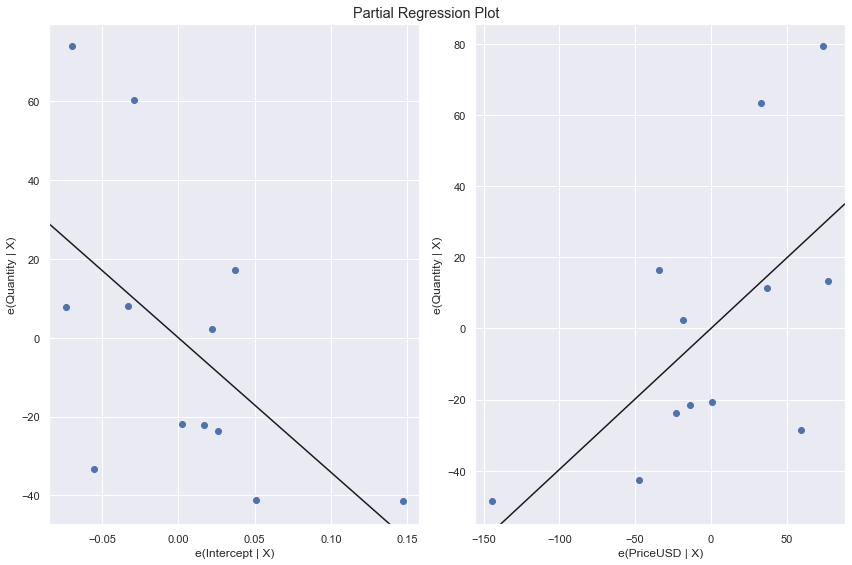

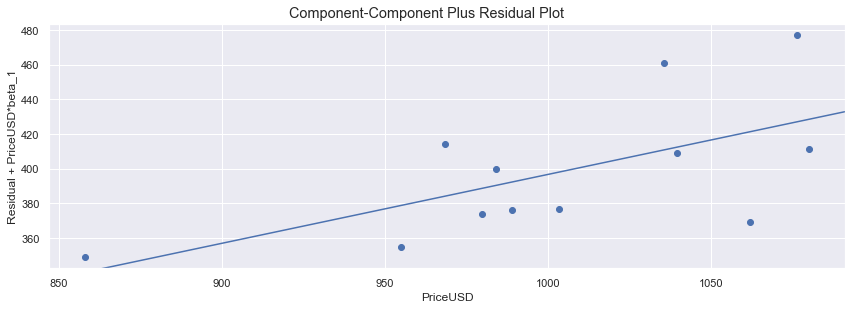

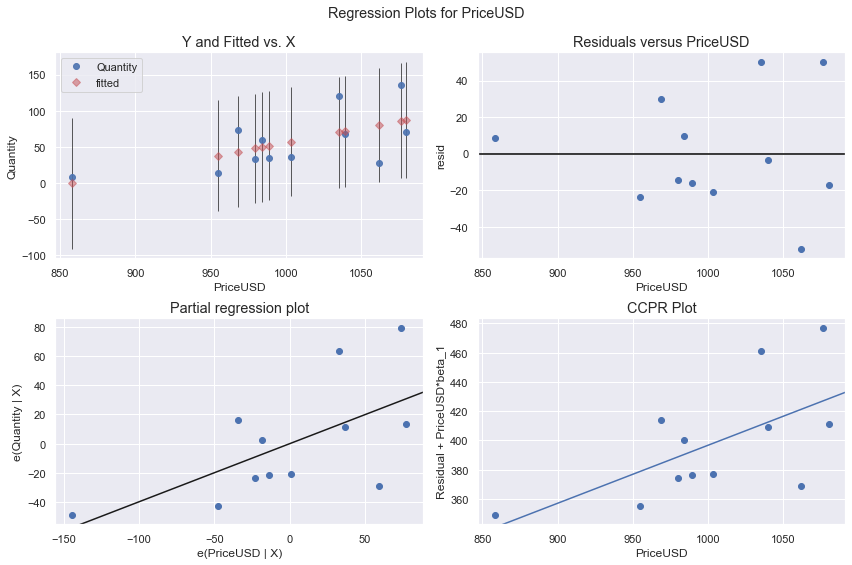

,Model,Elasticity
0,RS57K4000SA/EF,0.396754


In [5]:
elasticity_ols_models(data2, ['RS57K4000SA/EF'], give_info=True)

In [6]:
res = elasticity_ols_models(data2, data2['Model'].unique())

<ipython-input-7-c2a350b74894>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  elast_more_zero[i] = res[res['Model'].isin(model_tree[i])][res['Elasticity'] >0.3]


INDESIT: ['IBS 18 AA (UA)', 'DS 3161 W', 'DS 3181 S (UA)', 'LI8 FF2 W', 'DF 4181 X']


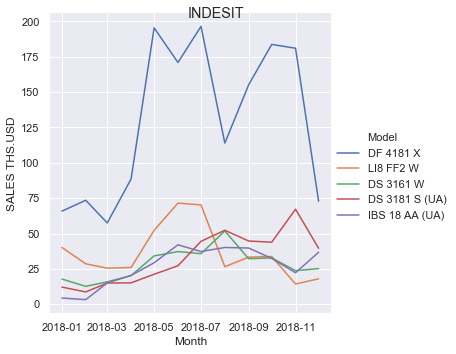

WHIRLPOOL: ['BSNF9151OX', 'BSNF9152W', 'BSNF 9121 W']


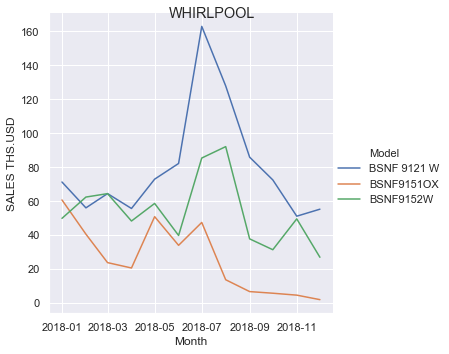

LG: ['GA-B389SQQZ', 'GA-B429SQCZ', 'GA-B 389 SMQZ', 'GA-B429SMQZ', 'GA-B429SECZ']


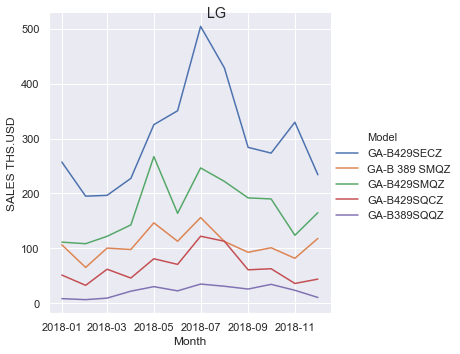

SAMSUNG: ['RS57K4000SA/EF', 'RB31FSRNDSA/UA', 'RB31FSRNDEF', 'RB29FSRNDSA/UA', 'RB37J5000EF/UA']


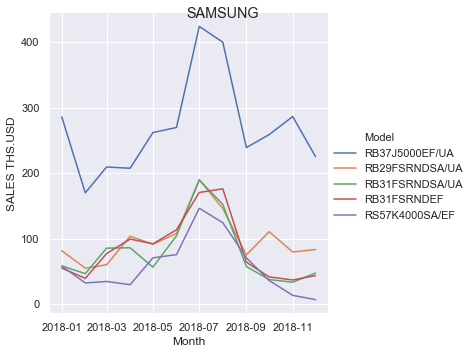

BOSCH: ['KGN39XL35', 'KGN49XL30G']


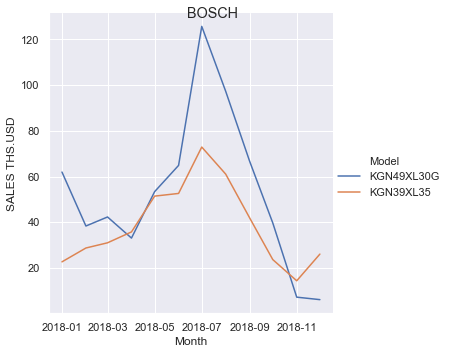

ELENBERG: ['MR 102-O', 'MR 51-O', 'MRF 146-O', 'MRF-220']


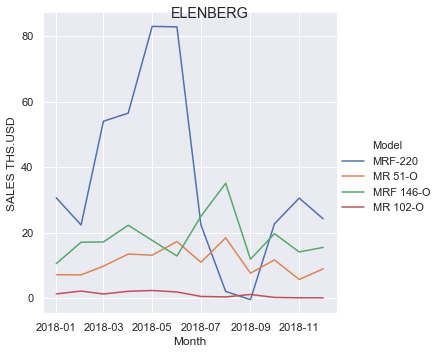

DELFA: ['DTF-140', 'BCD-138']


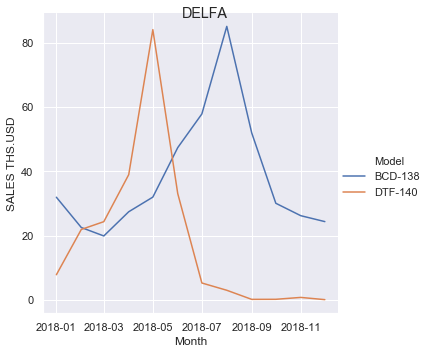

VESTFROST: ['VD 142 RW', 'RF 383 EB', 'CMR 085 W', 'RF 383 EX', 'CNF 201 ZW']


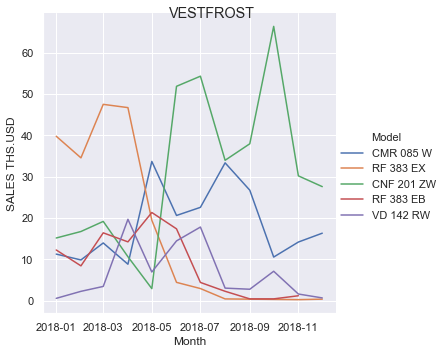

ATLANT: ['XM 4012-100', 'MXM-2808-95', 'XM-6325-101', 'MXM-2835-95', 'XM-6025 100']


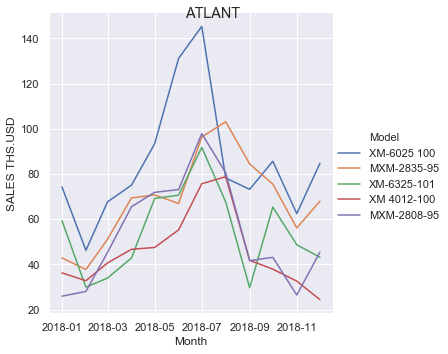

BEKO: ['RCSA300K21W', 'RCSA330K21W', 'RDSU8240K20W', 'RDSA240K20S', 'RCNK310E20S']


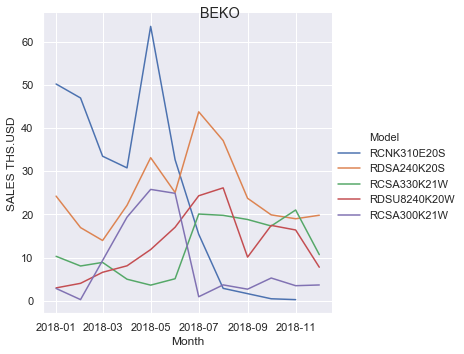

ZANUSSI: ['ZRX51100WA', 'ZRG 11600 WA', 'ZRT23102WA', 'ZRT27101WA', 'ZRT23100WA']


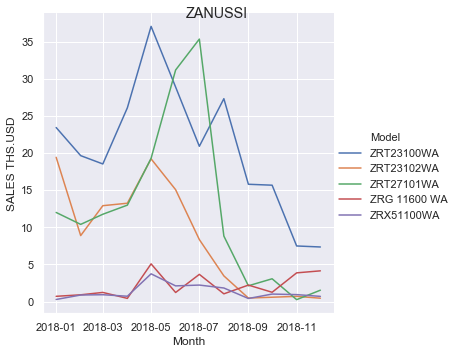

SNAIGE: ['RF31SM-S1CB21', 'RF32SM-S10021', 'RF34SM-S1MA21', 'FR240-1101AA', 'RF36SM-S10021']


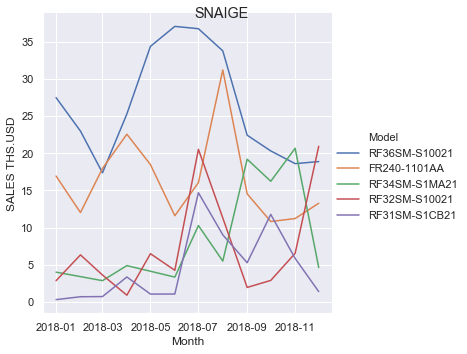

CANDY: ['CCBF-P6182W', 'CKBS 5162 X', 'CCDS 5142 S', 'CCDS 5142W']


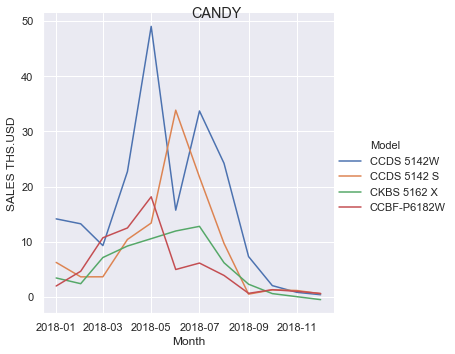

GORENJE: ['RK 6191 EW', 'RK6191BW']


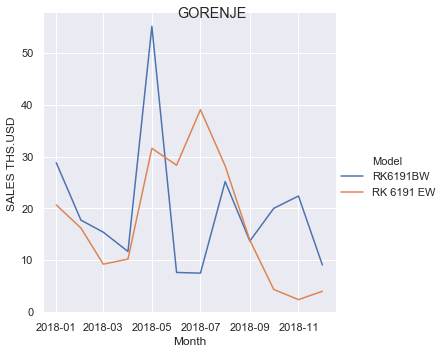

ERGO: ['MR-145', 'MRF-185', 'MRF-156', 'MR-130']


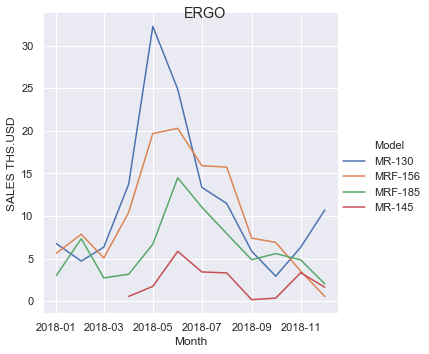

SHARP: ['SJ-B1239M4W']


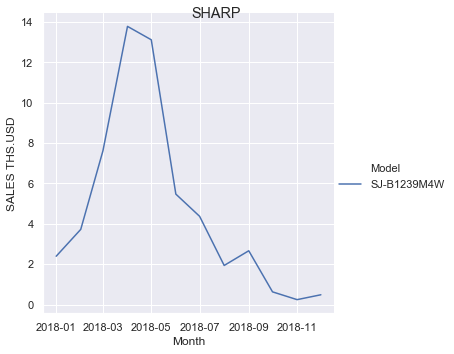

HOTPOINT-ARIS: ['XH8 T2I X']


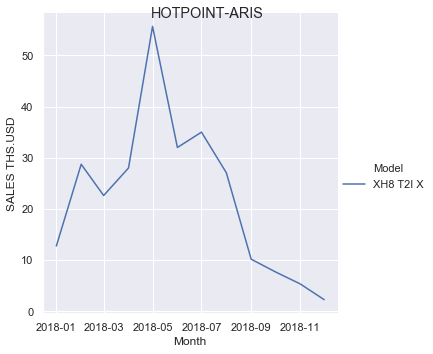

NORD: ['M 65']


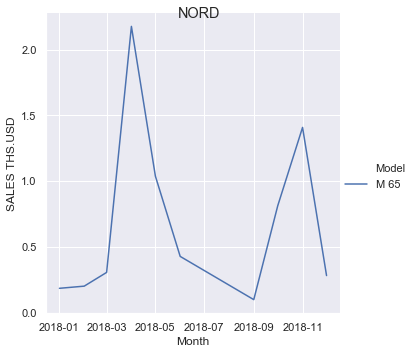

SATURN: ['ST-CF2951', 'ST-CF2950']


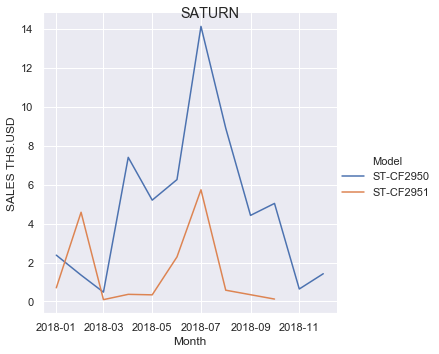

LIBERTY: ['DR-122', 'HRF-230 X', 'HRF-295 W']


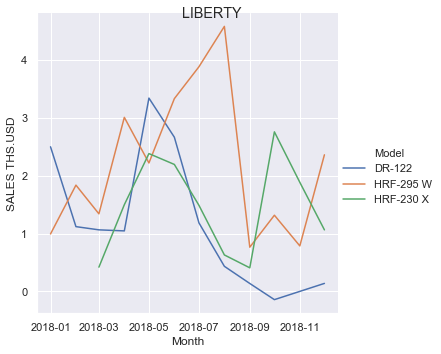

SMART: ['SD100WA 11N TM']


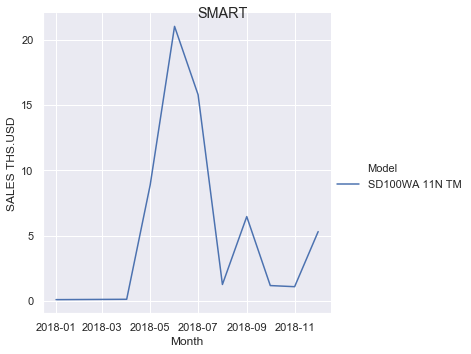

ROTEX: ['RR-SD100']


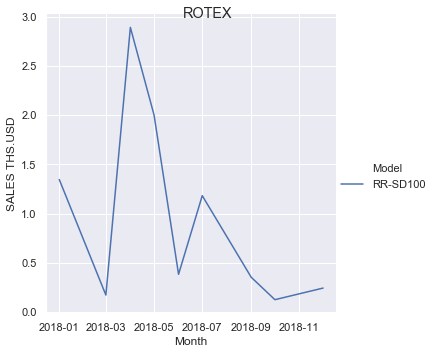

HAIER: ['HTTF-406S']


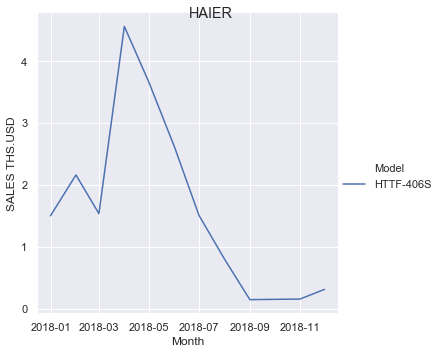

PROFYCOOL: ['BC 50B']


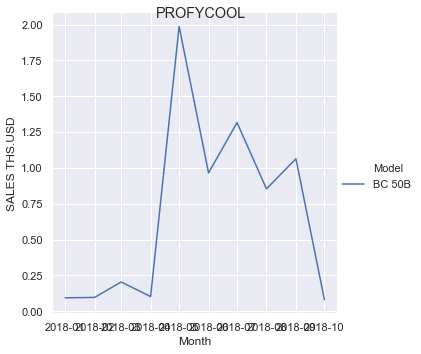

PRIME TECHNIC: ['RTS 1401 M']


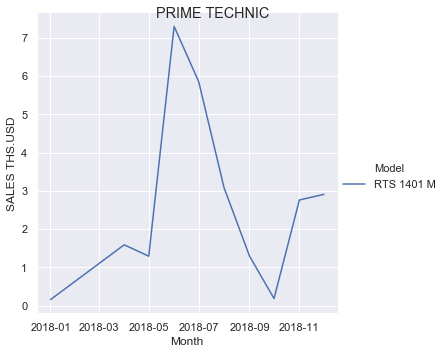

In [7]:
elast_more_zero = {}#моделі з додатною еластичністю
for i in model_tree.keys():
    elast_more_zero[i] = res[res['Model'].isin(model_tree[i])][res['Elasticity'] >0.3]
    prov = elast_more_zero[i]['Model'].unique()
    if(len(prov)>0):
        prov = sorted(prov, key=lambda x: (data2[data2['Model'] == x])['SALES THS.USD'].mean())
        print(i + ': ' + str(prov[-5:]))
        plot_dynamics(data2, prov[-5:], title=i)